In [61]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.gaussian_process import GaussianProcessRegressor

In [62]:
X1 = np.load(r'C:\Users\xdb13122\Desktop\ML Course\capstone project\initial_data\function_2\initial_inputs.npy')
Y1 = np.load(r'C:\Users\xdb13122\Desktop\ML Course\capstone project\initial_data\function_2\initial_outputs.npy')
X2 = np.load(r'C:\Users\xdb13122\Desktop\ML Course\capstone project\initial_data2\function_2\initial_inputs.npy')
Y2 = np.load(r'C:\Users\xdb13122\Desktop\ML Course\capstone project\initial_data2\function_2\initial_outputs.npy')
X = np.concatenate((X1, X2), axis=0)
Y = np.concatenate((Y1, Y2), axis=0)

In [63]:
X

array([[0.66579958, 0.12396913],
       [0.87779099, 0.7786275 ],
       [0.14269907, 0.34900513],
       [0.84527543, 0.71112027],
       [0.45464714, 0.29045518],
       [0.57771284, 0.77197318],
       [0.43816606, 0.68501826],
       [0.34174959, 0.02869772],
       [0.33864816, 0.21386725],
       [0.70263656, 0.9265642 ],
       [0.33162594, 0.08049911],
       [0.10053279, 0.47759524],
       [0.67793216, 0.87370355],
       [0.13495584, 0.52115767],
       [0.53715567, 0.24471459],
       [0.6591284 , 0.63064156],
       [0.47045207, 0.53376825],
       [0.72120239, 0.36450644],
       [0.7227338 , 0.43801822],
       [0.24066761, 0.14122907]])

In [64]:
new_row = np.array([[0.581441, 0.793009], [0.582335, 0.772719], [0.594959, 0.762502],[0.594959, 0.762502], [0.568284, 0.760656], [0.57303, 0.75755]])
X = np.concatenate((X, new_row), axis=0)

In [65]:
X

array([[0.66579958, 0.12396913],
       [0.87779099, 0.7786275 ],
       [0.14269907, 0.34900513],
       [0.84527543, 0.71112027],
       [0.45464714, 0.29045518],
       [0.57771284, 0.77197318],
       [0.43816606, 0.68501826],
       [0.34174959, 0.02869772],
       [0.33864816, 0.21386725],
       [0.70263656, 0.9265642 ],
       [0.33162594, 0.08049911],
       [0.10053279, 0.47759524],
       [0.67793216, 0.87370355],
       [0.13495584, 0.52115767],
       [0.53715567, 0.24471459],
       [0.6591284 , 0.63064156],
       [0.47045207, 0.53376825],
       [0.72120239, 0.36450644],
       [0.7227338 , 0.43801822],
       [0.24066761, 0.14122907],
       [0.581441  , 0.793009  ],
       [0.582335  , 0.772719  ],
       [0.594959  , 0.762502  ],
       [0.594959  , 0.762502  ],
       [0.568284  , 0.760656  ],
       [0.57303   , 0.75755   ]])

In [66]:
Y

array([ 0.53899612,  0.42058624, -0.06562362,  0.29399291,  0.21496451,
        0.02310555,  0.24461934,  0.03874902, -0.01385762,  0.61120522,
       -0.02995427,  0.08311962,  0.56114332,  0.01347696,  0.38994406,
        0.42201818,  0.58695686,  0.56954976,  0.69483209,  0.03376806])

In [67]:
new_row = np.array([0.12487407066209044, 0.03227754588908613, 0.05735913424776838, 0.03445339657998674, 0.1310947935880279, 0.16975558647238007])
Y = np.concatenate((Y, new_row), axis=0)

In [68]:
Y

array([ 0.53899612,  0.42058624, -0.06562362,  0.29399291,  0.21496451,
        0.02310555,  0.24461934,  0.03874902, -0.01385762,  0.61120522,
       -0.02995427,  0.08311962,  0.56114332,  0.01347696,  0.38994406,
        0.42201818,  0.58695686,  0.56954976,  0.69483209,  0.03376806,
        0.12487407,  0.03227755,  0.05735913,  0.0344534 ,  0.13109479,
        0.16975559])

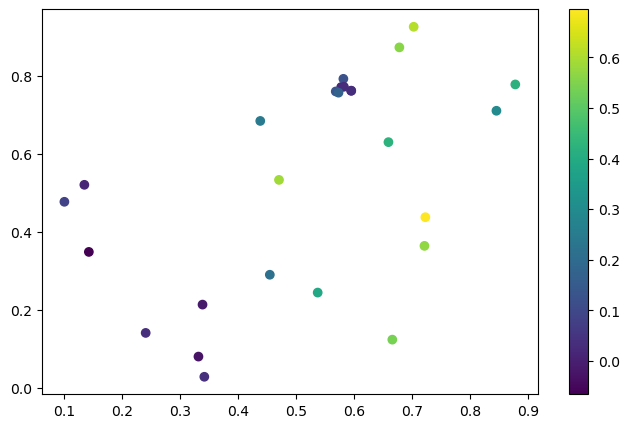

In [69]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.colorbar()

In [ ]:
# Random search around an area restricted around $x$ = [0.57771284, 0.77197318]
next_query_x1 = np.random.normal(0.666666, scale = 0.01)
next_query_x2 = np.random.normal(0.153423, scale = 0.01)
print('Next query Random: ', [next_query_x1, next_query_x2])

# Using a restricted UCB
gpr = GaussianProcessRegressor()
gpr.fit(X, Y)

# to optimize the acquisition function, we will simply use gridsearch over a space of 10.000 gridpoints
x1 = np.linspace(0.65, 0.8, 100)
x2 = np.linspace(0.3, 0.6, 100)

X_grid = []
for i in range(len(x1)):
    for j in range(len(x2)):
        X_grid.append([x1[i], x2[j]])

X_grid = np.array(X_grid)
mean, std = gpr.predict(X_grid, return_std = True)
ucb = mean + 1.96 * std

idx_max = np.argmax(ucb)
next_query = X_grid[idx_max]
print('Next query UCB: ', next_query)

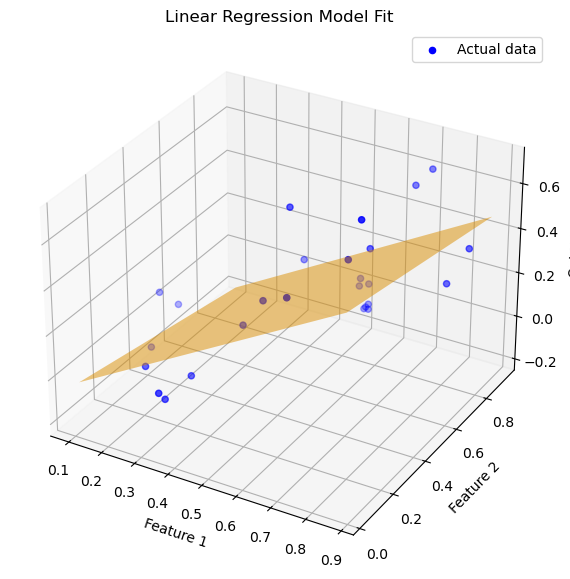

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

# Sample data (replace with your actual data)
X = X
y = Y

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Generate predictions
predictions = model.predict(X)

# Create a mesh grid for the two features to plot the regression plane
x0_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
x1_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
x0_grid, x1_grid = np.meshgrid(x0_range, x1_range)
y_grid = model.intercept_ + model.coef_[0] * x0_grid + model.coef_[1] * x1_grid

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the original data points
ax.scatter(X[:, 0], X[:, 1], y, color='blue', label='Actual data')

# Plot the regression plane
ax.plot_surface(x0_grid, x1_grid, y_grid, color='orange', alpha=0.5, rstride=100, cstride=100)

# Label axes
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Output")
ax.set_title("Linear Regression Model Fit")

# Show legend and plot
ax.legend()
plt.show()

In [72]:
import numpy as np
from sklearn.linear_model import LinearRegression
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args

# Sample data (replace with your actual data)
X = X
y = Y

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Define the search space for the two input features
space = [
    Real(X[:, 0].min(), X[:, 0].max(), name="x1"),
    Real(X[:, 1].min(), X[:, 1].max(), name="x2")
]

# Define the objective function to maximize the model's prediction
@use_named_args(space)
def objective(**params):
    # Convert the dictionary of params to a 2D array for prediction
    x_pred = np.array([[params["x1"], params["x2"]]])
    # We return the negative prediction to maximize, as `gp_minimize` minimizes the function
    return -model.predict(x_pred)[0]

# Run Bayesian Optimization
result = gp_minimize(objective, space, n_calls=30, random_state=0)

# Best parameters found
best_x1, best_x2 = result.x
max_prediction = -result.fun

print(f"Best parameters: x1 = {best_x1}, x2 = {best_x2}")
print(f"Maximum predicted output: {max_prediction}")

Best parameters: x1 = 0.8777909889953304, x2 = 0.028697719822277867
Maximum predicted output: 0.633339219937038


C:\Users\xdb13122\AppData\Local\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.8777909889953304, 0.028697719822277867] before, using random point [0.1282924215588964, 0.5125709434439246]
  warnings.warn(


Best parameters: x1 = 0.8777909889953304, x2 = 0.41763369119137317
Maximum predicted output (log-likelihood): 0.37821518621952793


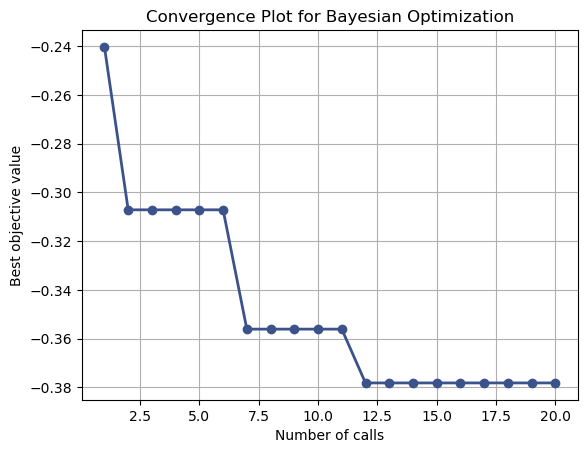

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args
from skopt.plots import plot_convergence

X = X
y = Y

# Define the Gaussian Process kernel with a higher noise level
kernel = C(1.0, (1e-4, 1e4)) * RBF(length_scale=1.0, length_scale_bounds=(1e-3, 1e3))

# Fit the Gaussian Process model with noise set by alpha
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1)
gp.fit(X, Y)

# Define the search space for Bayesian Optimization
space = [
    Real(X[:, 0].min(), X[:, 0].max(), name="x1"),
    Real(X[:, 1].min(), X[:, 1].max(), name="x2")
]

# Define the objective function for Bayesian Optimization
@use_named_args(space)
def objective(**params):
    x_pred = np.array([[params["x1"], params["x2"]]])
    y_pred, _ = gp.predict(x_pred, return_std=True)
    return -y_pred[0]

# Run Bayesian Optimization with Expected Improvement acquisition function
result = gp_minimize(
    objective, space, n_calls=20, random_state=0, acq_func="EI", n_initial_points=5
)

# Extract optimal parameters and maximum log-likelihood prediction
best_x1, best_x2 = result.x
max_prediction = -result.fun

print(f"Best parameters: x1 = {best_x1}, x2 = {best_x2}")
print(f"Maximum predicted output (log-likelihood): {max_prediction}")
# Plot the convergence plot
plot_convergence(result)
plt.title("Convergence Plot for Bayesian Optimization")
plt.xlabel("Number of calls")
plt.ylabel("Best objective value")
plt.show()